In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


output_dir = "plots/complete"
os.makedirs(output_dir, exist_ok=True)

df_complete = pd.read_csv("results/complete_evaluation_results.csv")

condition = (df_complete["Code & Software Availability"] == "Met") & (df_complete["Data Accessibility & Transparency"] == "Met")
print(len(df_complete[condition]))


12


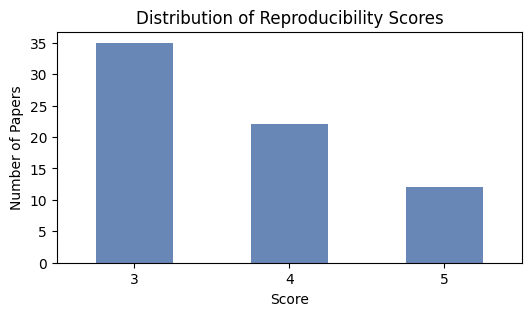

score
3    35
4    22
5    12
Name: count, dtype: int64


In [2]:
plt.figure(figsize=(6,3))
sns.countplot(data=df_complete, x="score",color="#5B84C4", dodge=False, width=0.5)
plt.title("Distribution of Reproducibility Scores")
plt.xlabel("Score")
plt.ylabel("Number of Papers")
plt.show()
print(df_complete["score"].value_counts())
#plt.savefig(f"{output_dir}/complete_repro_scores.png", dpi=300, bbox_inches="tight")
#plt.close()

In [5]:
counts = df_complete["reproducible"].value_counts().reindex(["yes","no"])
total = sum(counts)

plt.figure(figsize=(5,3))
plt.pie(counts, labels=counts.index, autopct=lambda p: f"{int(round(p * total / 100))}", colors=["#66c2a5", "#fc8d62"])
plt.title("Reproducible vs Non-Reproducible")
#plt.show()
print(df_complete["reproducible"].value_counts())
plt.savefig(f"{output_dir}/complete_repro_vs_no.png", dpi=300, bbox_inches="tight")
plt.close()

reproducible
no     57
yes    12
Name: count, dtype: int64


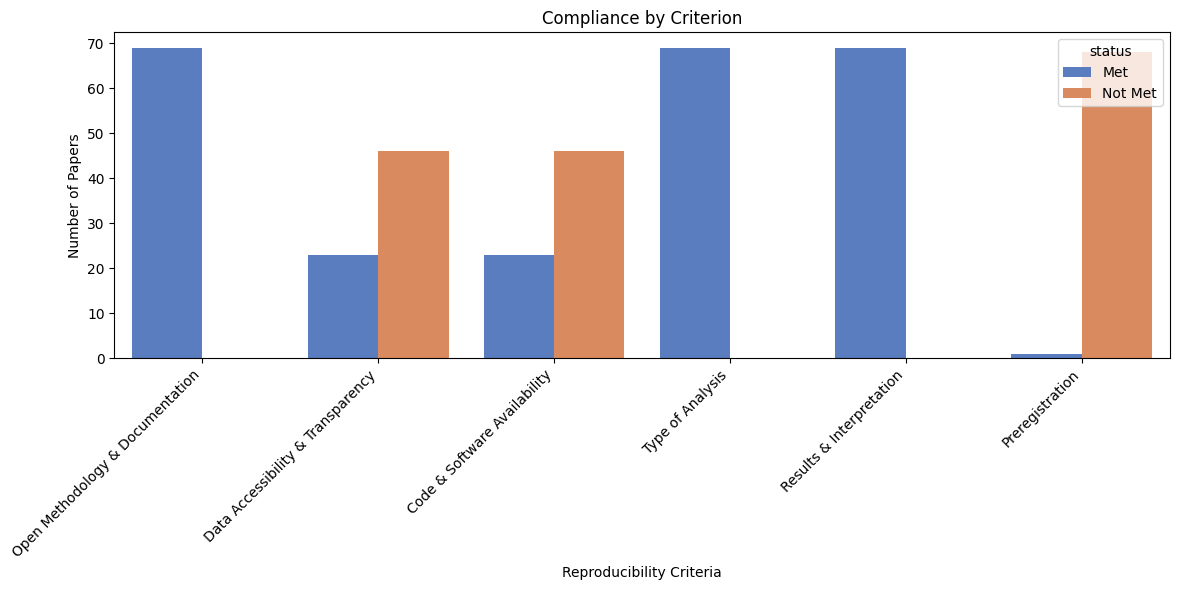

status                                   Met   Not Met
criterion                                             
Code & Software Availability        23 33.3%  46 66.7%
Data Accessibility & Transparency   23 33.3%  46 66.7%
Open Methodology & Documentation   69 100.0%    0 0.0%
Preregistration                       1 1.4%  68 98.6%
Results & Interpretation           69 100.0%    0 0.0%
Type of Analysis                   69 100.0%    0 0.0%


In [4]:
categories = df_complete.columns[3:]

melted = df_complete.melt(value_vars=categories, var_name="criterion", value_name="status")

counts = melted.groupby("criterion")["status"].value_counts().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis= 0) * 100

plt.figure(figsize=(12,6))
sns.countplot(data=melted, x="criterion", hue="status", order=categories, palette="muted")

plt.title("Compliance by Criterion")
plt.xlabel("Reproducibility Criteria")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha="right")
plt.legend(title="status")
plt.tight_layout()
plt.show()
print(counts.astype(str) + " " + percentages.round(1).astype(str)+"%")
#plt.savefig(f"{output_dir}/complete_comp_criterion.png", dpi=300, bbox_inches="tight")
#plt.close()